In [1]:
import os
from config import *
from tqdm import tqdm
from utils.dataset import DrawingsDataset
from utils.data_utils import load_dataset
from matplotlib.pyplot import imshow, show

import torch
from model import resnet50

In [2]:
model = resnet50().cuda()
model.load_state_dict(torch.load('./models/model.pth'))

<All keys matched successfully>

# Predict from the test dataset

label: alarm_clock
prediction: alarm_clock


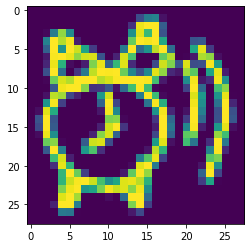

In [3]:
test_data = DrawingsDataset(mtype="test")
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)

with torch.no_grad():
    dataiter = iter(test_loader)

    drawings, labels = dataiter.next()
    drawings = drawings.view(-1, 1, IMAGE_SIZE, IMAGE_SIZE).cuda()
    drawings /= 255.0

    model.eval()
    outputs = model(drawings)
    _, predicted = torch.max(outputs, 1)

    i = 0

    imshow(drawings[i].view(28, 28).cpu())
    print(f'label: {CLASSES[labels[i]]}')
    print(f'prediction: {CLASSES[predicted[i]]}')

In [4]:
outputs

tensor([[ 0.3553, -0.3290, -2.4193,  4.6389, -0.2165, -0.1789, -1.1247, -0.1087,
         -0.0595, -0.6057]], device='cuda:0')

# Predict from custom data

In [5]:
x = [[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 109., 249.,  43.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,  42., 132.,  52.,   0.,   0.,   3., 147., 255., 166.,   5.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,  74., 245., 255., 216.,  75., 178., 255., 145.,   2.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,  12.,  93., 180., 248., 250.,  92.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0., 227., 208.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0., 105., 255.,  52.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,  12., 240., 158.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0., 143., 248.,  22.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   4.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,  80., 254., 228., 226., 104.,
           98.,  85.,  85.,  85.,  85.,  86., 102., 200., 249., 227., 208.,
          194., 186., 198., 114.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0., 199., 255., 255., 255., 255.,
          255., 255., 255., 255., 255., 255., 255., 255., 254., 255., 255.,
          255., 255., 254., 113.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,  72., 249., 196., 135., 127., 149.,
          233., 245.,  86.,  34.,  34.,  34.,  44., 208., 255., 208., 143.,
          124., 193., 255., 119.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   7., 226., 203.,  11.,   0.,   0.,   0.,
           18., 209., 240.,  34.,   0.,   0., 168., 239.,  78.,   1.,   0.,
            0.,   5., 157., 255.,  92.,   0.],
         [  0.,   0.,   0.,   0.,  91., 255.,  60.,   0.,   0.,   0.,   0.,
            0.,  48., 255.,  83.,   0.,   0., 216., 174.,   0.,   0.,   0.,
            0.,   0.,  34., 255.,  92.,   0.],
         [  0.,   0.,   0.,   0., 126., 250.,   0.,   0.,   0.,   0.,   0.,
            0.,  39., 255.,  83.,   0.,   0., 154., 233.,   2.,   0.,   0.,
            0.,  34., 191., 252.,  40.,   0.],
         [  0.,   0.,   0.,   0., 122., 251.,   6.,   0.,   0.,   0.,   0.,
            0.,  88., 255.,  62.,   0.,   0.,  74., 255., 169.,  87.,  93.,
          165., 247., 238.,  84.,   0.,   0.],
         [  0.,   0.,   0.,   0.,  69., 255., 146.,   2.,   0.,   0.,   0.,
           27., 225., 205.,   1.,   0.,   0.,   0., 119., 239., 255., 255.,
          230., 142.,  21.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0., 131., 255., 212., 110., 102., 130.,
          231., 238.,  44.,   0.,   0.,   0.,   0.,   0.,   8.,  34.,  31.,
            2.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,  76., 209., 255., 255., 252.,
          174.,  44.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17.,  17.,  10.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.]]

In [6]:
# convert raw list to pytorch tensor and normalize it
x = torch.FloatTensor(x)
x = x.view(-1, 1, IMAGE_SIZE, IMAGE_SIZE).cuda()
x = x / 255.0
x.shape

torch.Size([1, 1, 28, 28])

prediction: bicycle


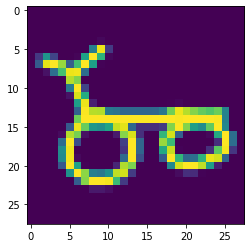

In [7]:
model.eval()
outputs = model(x)
_, predicted = torch.max(outputs, 1)

print(f'prediction: {CLASSES[predicted[i]]}')
imshow(x.view(28, 28).cpu())

In [8]:
outputs

tensor([[-0.5209,  6.9917,  0.2599,  0.1100, -2.9612,  0.8653, -2.3611, -1.7210,
          0.1789, -0.8713]], device='cuda:0', grad_fn=<AddmmBackward>)